# Transactional Payment Data Analysis 

### Import Data and Check Basic Data Structure:

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/shiyuzhang/Desktop/synthetical_payments.csv')

In [3]:
df.head()

,userId,billingCountry,transactionTime,product,price,amount,period
0,41851,United States,1420334701,PRO,99.99,1007.90,12
1,13575,India,1420383152,PRO,99.99,99.99,1
2,73971,India,1420461487,PRO,99.99,99.99,1
3,80119,United States,1421010897,GURU,199.99,2015.90,12
4,90456,United States,1421020614,GURU,199.99,2015.90,12


### Check data type for all columns and see if there are any wrong data types :

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 7 columns):
userId             38498 non-null int64
billingCountry     38498 non-null object
transactionTime    38498 non-null int64
product            38498 non-null object
price              38498 non-null float64
amount             38498 non-null float64
period             38498 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 2.1+ MB


In [14]:
# change user id data type from int to object for better analysis 
df['userId'] = df['userId'].astype(object)
df.userId.dtypes

dtype('O')

### Check statistical summary of all the features including numeric and categorical variables:

In [15]:
df.describe(include = 'all')

,userId,billingCountry,transactionTime,product,price,amount,period
count,38498.0,38498,3.849800e+04,38498,38498.000000,38498.000000,38498.000000
unique,22438.0,5,NaN,3,NaN,NaN,NaN
top,12403.0,United Kingdom,NaN,GURU,NaN,NaN,NaN
freq,17.0,9649,NaN,19576,NaN,NaN,NaN
mean,NaN,NaN,1.487614e+09,NaN,171.435270,411.884691,2.788379
std,NaN,NaN,2.001986e+07,NaN,78.482071,681.548175,4.058854
min,NaN,NaN,1.420335e+09,NaN,99.990000,49.990000,1.000000
25%,NaN,NaN,1.475015e+09,NaN,99.990000,99.990000,1.000000
50%,NaN,NaN,1.491777e+09,NaN,199.990000,199.990000,1.000000
75%,NaN,NaN,1.503919e+09,NaN,199.990000,199.990000,1.000000


### Check missing values :

In [18]:
df.isnull().sum()

userId             0
billingCountry     0
transactionTime    0
product            0
price              0
amount             0
period             0
dtype: int64

#### It's great that there is no missing values in this dataset, however, if there is, I would choose to replace the missing value 
#### either with mean/ median / other more complexed model if it's numeric; with most frequency if it's categorical variable

### Check outliers:

### I choose to visualize the dataset using box plot to detect outliers 

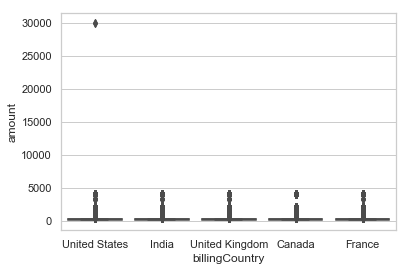

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
box_1 = sns.boxplot(x=df['billingCountry'],y=df['amount'])

# From the plot we can see that there are some significant outliers in the 'amount' column from original dataset

### Remove outlier and create a new dataframe called df_new:

In [22]:
df_new = df[df['amount']<1000]

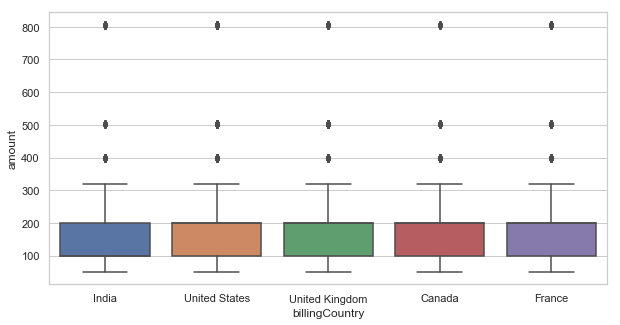

In [28]:
plt.figure(figsize=(10,5))
box_2 = sns.boxplot(x=df_new['billingCountry'],y=df['amount'])